This notebook is an analysis of the leaked Conti ransomeware group chats. The messages date from 2020 to 2021.
https://github.com/TimAngevare/ContiRansomeware_Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import and inspect our data

In [2]:
chats = pd.read_csv('chat.csv')
chats.head(20)

,Unnamed: 0,ts,from,to,body,body_en,body_language
0,0,2021-08-23T06:17:46.326321,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
1,1,2021-08-23T06:21:29.401324,driver@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
2,2,2021-08-23T06:43:20.480030,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
3,3,2021-08-23T06:43:46.773096,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
4,4,2021-08-23T06:44:22.941040,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
5,5,2021-08-23T06:45:20.386289,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
6,6,2021-08-23T08:00:32.458165,bentley@q3mcco35auwcstmt.onion,many@q3mcco35auwcstmt.onion,"Привет, бро. Криптанем длл?","Hi, bro. Kriptanem dll?",sr
7,7,2021-08-23T08:49:29.453987,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,[15:37:46] <many@q3mcco35auwcstmt.onion> скинь...,[15:37:46]<many@q3mcco35auwcstmt.onion> throw ...,ru
8,8,2021-08-23T08:49:29.527162,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,),),en
9,9,2021-08-23T09:24:27.533674,mentos@q3mcco35auwcstmt.onion,tunri@q3mcco35auwcstmt.onion,привет,Hey,NaN


Convert date to date and what is our date range?

In [3]:
chats['ts'] = pd.to_datetime(chats['ts'])
print(chats['ts'].min(), chats['ts'].max())

2021-01-29 00:06:46.929363 2022-03-02 18:02:33.731867


How many different indivuals are there from and to?

In [14]:
chats[['from', 'to']].nunique()

from    274
to      341
dtype: int64

Let's visualize the frequency of our messages

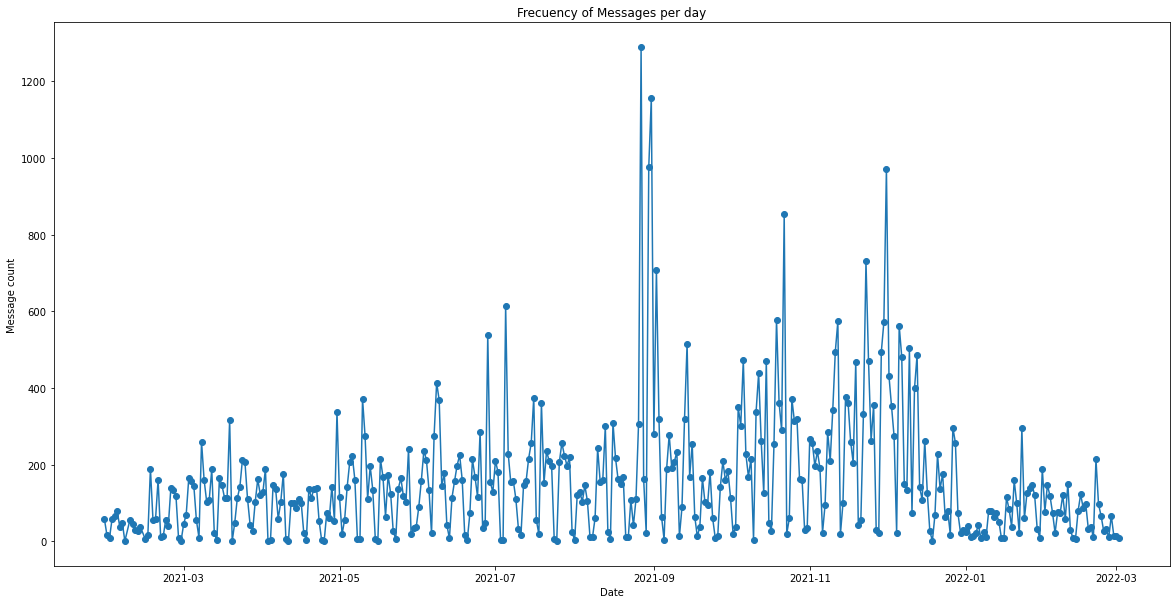

In [4]:
daily_message=chats.groupby(chats['ts'].dt.date).count()

plt.figure(figsize=(20,10))
plt.plot(daily_message.index, daily_message['ts'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day")
plt.show()


Lets further investigate these peaks around september 2021

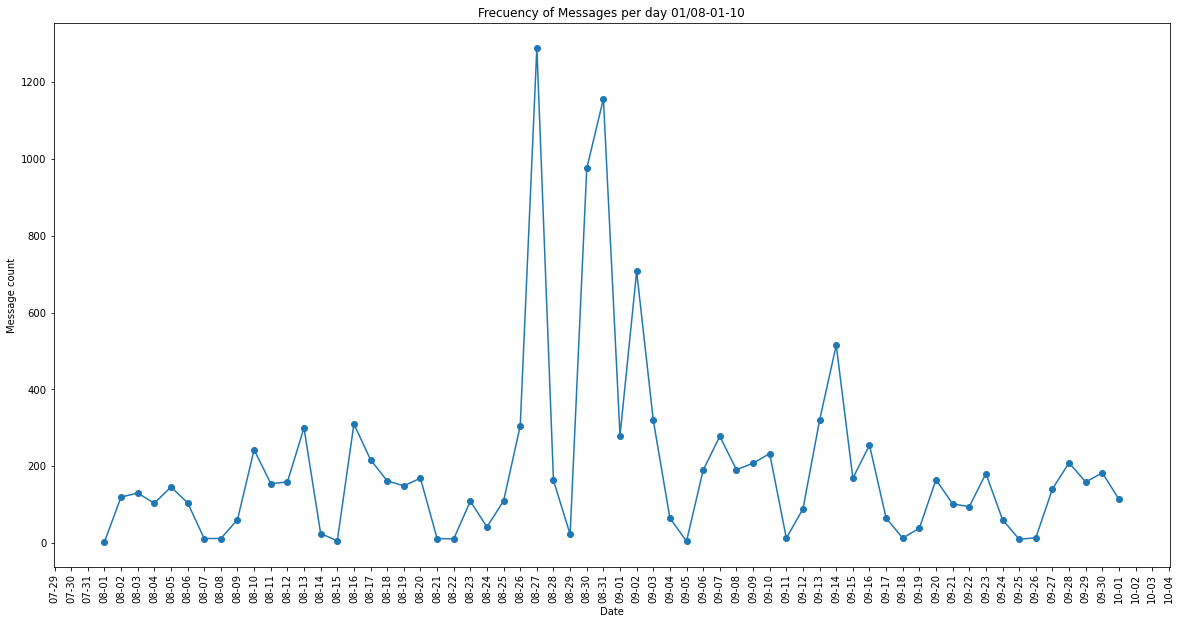

In [5]:
import matplotlib.dates as mdates
start_date = datetime.date(2021,8,1)
end_date = datetime.date(2021,10,1)

filtered_daily_message = daily_message[(daily_message.index >= start_date) & (daily_message.index <= end_date)]
plt.figure(figsize=(20,10))
plt.plot(filtered_daily_message.index, filtered_daily_message['ts'], marker='o', linestyle='-')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set the interval to 1 day
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.xticks(rotation=90)

plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day 01/08-01-10")
plt.show()

Lets look at the Linguistics of the messages

In [6]:
messages_peak = chats['body_en']
messages_peak = messages_peak[(messages_peak != '[Error: The message is encrypted and cannot be decrypted.]') & (messages_peak !='[ERROR: This message is encrypted, and you are unable to decrypt it.]')]

In [7]:
import nltk
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timangevare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words by frequency

In [8]:

messages_str = ' '.join(messages_peak)
words = nltk.word_tokenize(messages_str)
cleaned_words = []

for word in words:
    if word not in stop_words and word not in string.punctuation:
        cleaned_words.append(word)

fd = nltk.FreqDist(cleaned_words)
fd.most_common(20)

[('I', 8650),
 ('39', 5310),
 ('Hey', 2930),
 ('everything', 1801),
 ('https', 1669),
 ('’', 1598),
 ('need', 1426),
 ('write', 1347),
 ('work', 1304),
 ('new', 1256),
 ('already', 1148),
 ('bro', 1123),
 ('Hello', 1105),
 ('1', 1026),
 ('2', 1008),
 ('domain', 994),
 ('server', 986),
 ('like', 973),
 ('hello', 966),
 ('3', 963)]

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/timangevare/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

What is the mood of the messages?

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(messages_str)

{'neg': 0.062, 'neu': 0.82, 'pos': 0.118, 'compound': 1.0}

See if we can find important information in the text

In [11]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/timangevare/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/timangevare/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/timangevare/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [12]:
persons = []
organizations = []
gp_entity = []
other = []
locations = []

pos_tagged = nltk.pos_tag(words)
ne_tagged = nltk.ne_chunk(pos_tagged)
for ne in ne_tagged:
    if hasattr(ne, "label"):
        if ne.label() == "PERSON":
            persons.append(ne[0:][0])
        elif ne.label() == "ORGANIZATION":
            organizations.append(ne[0:][0])
        elif ne.label() == "GPE":
            gp_entity.append(ne[0:][0])
        elif ne.label() == "LOCATION":
            locations.append(ne[0:][0])    
        else:
            other.append([ne.label(), ne[0:][0]])

print("persons \n", persons)
print("organizations \n", organizations)
print("Geo political Entity \n", gp_entity)
print("locations \n", locations)
print("other \n", other)

persons 
 [('Kriptanem', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Test', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Simka', 'NNP'), ('Hello', 'NNP'), ('First', 'NNP'), ('Ready', 'JJ'), ('Trick', 'NNP'), ('Koba', 'NNP'), ('Vlad', 'NNP'), ('Vlad', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Готово', 'NNP'), ('Bro', 'NNP'), ('Trick', 'NNP'), ('Troika', 'NNP'), ('Koba', 'NNP'), ('Buildmachine', 'NNP'), ('Hey', 'NNP'), ('Derek', 'NNP'), ('Ef6H', 'NNP'), ('Client', 'NNP'), ('Klaus', 'NNP'), ('Klaus', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Geez', 'NNP'), ('Understood', 'NNP'), ('Too', 'NNP'), ('Hey', 'NNP'), ('Write', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Buzu', 'NNP'), ('Buterin', 'NNP'), ('Noah', 'NNP'), ('Well', 'NNP'), ('Frantir', 'NN'), ('Swift', 'NNP'), ('Sucks', 'NNP'), ('Hello', 'NNP'), ('Hof', 'NNP'), ('Dowload', 'NNP'), ('Gh

Now lets look for certain things in the messages

In [34]:
def search_messages(colunmName, regex):
    display(chats[chats[colunmName].str.contains(regex, regex=True, case=False)])

Bitcoin wallets?

In [35]:
search_messages('body_en', "^(bc1|[13])[a-zA-HJ-NP-Z0-9]{25,39}$")

/Users/timangevare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,ts,from,to,body,body_en,body_language
92,92,2021-08-23 18:56:40.649157,many@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,ar
310,310,2021-05-27 15:16:51.072961,salamandra@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3,1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3,en
323,323,2021-05-27 16:49:52.634635,salamandra@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3,1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3,en
561,561,2021-10-09 02:17:48.972071,many@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,ar
1165,1165,2021-10-25 13:43:20.964209,many@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,ar
...,...,...,...,...,...,...,...
57778,57778,2021-05-04 08:14:46.140163,rand@q3mcco35auwcstmt.onion,bentley@q3mcco35auwcstmt.onion,bc1qdxrwlru9hr0frts6sxjkeeevc9za5k32r3zsgx,bc1qdxrwlru9hr0frts6sxjkeeevc9za5k32r3zsgx,en
58199,58199,2021-12-27 20:48:49.052855,mango@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,bc1qve3zp5w6x858wz6v0ydxxyyktgjm4vyfja5ehz,bc1qve3zp5w6x858wz6v0ydxxyyktgjm4vyfja5ehz,en
58459,58459,2021-08-20 21:41:25.292390,many@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,ar
59804,59804,2021-10-26 05:10:26.091663,many@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,ar


Yahoo adresses?

In [36]:
search_messages('from',".+\..+@yahoo\.com")

,Unnamed: 0,ts,from,to,body,body_en,body_language


In [37]:
search_messages('to',".+\..+@yahoo\.com")

,Unnamed: 0,ts,from,to,body,body_en,body_language


URLs?

In [41]:
search_messages('body_en', "https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()!@:%_\+.~#?&\/\/=]*)")

/Users/timangevare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,ts,from,to,body,body_en,body_language


Ip adresses (ipv4)?

In [43]:
search_messages('body', "(\b25[0-5]|\b2[0-4][0-9]|\b[01]?[0-9][0-9]?)(\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)){3}")

/Users/timangevare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,ts,from,to,body,body_en,body_language


Credit card numbers

In [44]:
search_messages('body', "(^4[0-9]{12}(?:[0-9]{3})?$)|(^(?:5[1-5][0-9]{2}|222[1-9]|22[3-9][0-9]|2[3-6][0-9]{2}|27[01][0-9]|2720)[0-9]{12}$)|(3[47][0-9]{13})|(^3(?:0[0-5]|[68][0-9])[0-9]{11}$)|(^6(?:011|5[0-9]{2})[0-9]{12}$)|(^(?:2131|1800|35\d{3})\d{11}$)")

/Users/timangevare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,ts,from,to,body,body_en,body_language
884,884,2021-06-18 12:49:47.617359,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
895,895,2021-06-18 16:49:54.037696,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
982,982,2022-02-16 12:23:03.982725,porovoz@q3mcco35auwcstmt.onion,grand@q3mcco35auwcstmt.onion,https://pbs.twimg.com/profile_images/378800000...,https://pbs.twimg.com/profile_images/378800000...,en
6678,6678,2021-08-03 16:47:36.403375,driver@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,server closed the connection unexpectedly\n ...,server closed the connection unexpectedly\n ...,en
9305,9305,2021-07-07 14:45:12.720573,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
18159,18159,2021-06-28 22:21:22.249595,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
20799,20799,2021-06-24 00:22:00.737303,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
21196,21196,2021-06-25 13:07:42.982488,grand@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,https://www.topcashback.co.uk/\nhttps://www.si...,https://www.topcashback.co.uk/\nhttps://www.si...,en
25496,25496,2021-06-29 09:15:20.148986,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
25634,25634,2021-06-29 22:32:42.438129,kramer@q3mcco35auwcstmt.onion,ramon@q3mcco35auwcstmt.onion,53456453465677585,53456453465677585,en
